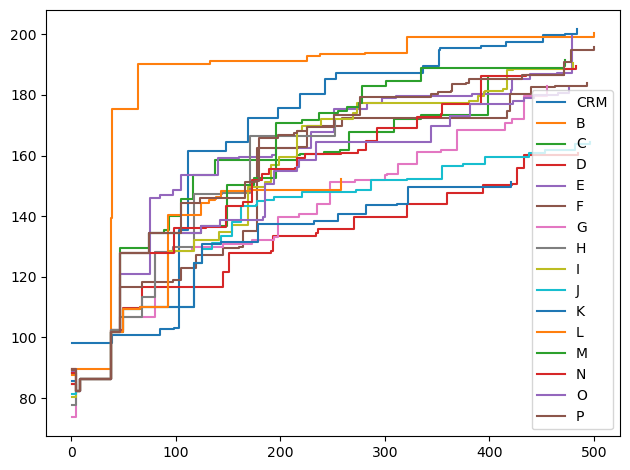

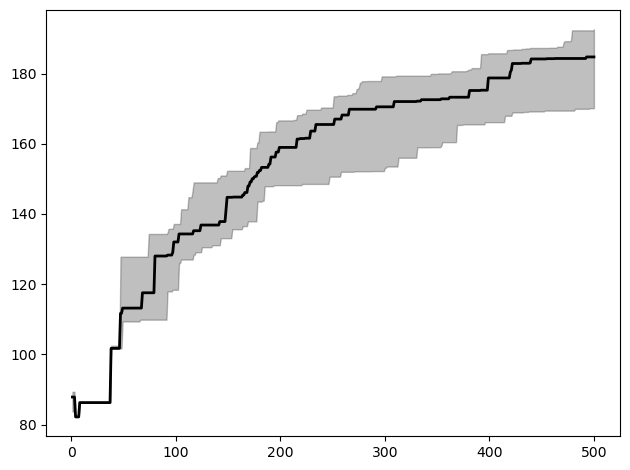

In [2]:
import common.star_api.design_manager as dm
import common.visualization as viz
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

work_dir = Path(r"/u/cd9zen/models/starPy")
name = "svd_proj"
version = "19.02.009-R8"


def plot_best_design_histories(proj: dm.DesignManagerProject):
    fig, ax = plt.subplots()
    only_opt = [s for s in proj if "Sherpa_" in s.name]
    for study in only_opt:
        label = study.name.split("_")[-1]
        df = study.get_all_designs().data_frame()
        ax = viz.plot_history(df=df, y_col="L_over_D", best_design=False, scatter=False, ax=ax, label=label)
    ax.legend(loc="best")
    plt.tight_layout()
    fig.savefig(work_dir.joinpath("bestDesignHist.png"), dpi=300)


def plot_statistical_histories(proj: dm.DesignManagerProject):
    only_opt = [s for s in proj if "Sherpa_" in s.name]
    d = {"Design#": np.arange(1, 501)}
    for study in only_opt:
        data = study.get_design_set("All Best").generate_history(col_name="L_over_D", max_designs=500)
        d[study.name] = data[:, 1]

    data = pd.DataFrame(d)
    data2 = data[data.columns[1:]]
    data["Min"] = data2.min(axis=1)
    data["Average"] = data2.mean(axis=1)
    data["Median"] = data2.median(axis=1)
    data["Max"] = data2.max(axis=1)
    data["Q1"] = data2.quantile(0.25, axis=1)
    data["Q3"] = data2.quantile(0.75, axis=1)
    fig, ax = plt.subplots()
    x = data["Design#"].to_numpy()
    med = data["Median"].to_numpy()
    q1 = data["Q1"].to_numpy()
    q3 = data["Q3"].to_numpy()
    ax.plot(x, med, color="k", linestyle="-", linewidth=2.0)
    ax.fill_between(x, q1, q3, alpha=0.25, color="k")
    plt.tight_layout()
    fig.savefig(work_dir.joinpath("statistical.png"), dpi=300)


if __name__ == "__main__":
    dmprj = dm.DesignManagerProject.get_proj_distrib(work_dir=work_dir, dmprj=name, distrib=r"/install/STAR-CCMP/lin64-r8/19.02.009_01/STAR-CCM+19.02.009-R8/star/bin/starccm+")
    plot_best_design_histories(dmprj)
    plot_statistical_histories(dmprj)
